In [1]:
import simplejson as json
import matplotlib.pyplot as plt
import pandas
import string
from datetime import datetime
import sklearn

%matplotlib inline
superinfo = open("attempt2.json", "r")
data = superinfo.read()
superdata = json.loads(data)
superinfo.close() 

In [2]:
#Split data into threads and posts datasets
#Make two new lists to append json's to so each is a list of jsons which I can then iterate through and clean

threaddata = []
postdata = []

for item in superdata:
    
    try:
        if item["threadurl"]:
            threaddata.append(item)
                   
    except:
        postdata.append(item)
        
print len(postdata)
print len(threaddata)
        

626450
5901


In [3]:
#Turn the lists of JSON's into lists of lists of cleaned attributes that I can then input into a dataframe

#initializing the tables to be appended to and then converted to dataframes
threadlists = []
postlists = []

#Cleaning/Creating thread list of lists

for json in threaddata:
 
    lst = []
    lst.append(json["threadurl"][0])
    replies = str(json["thread_replies"].replace(u'\xa0',u'').replace("\n","").replace("\t","").replace(" replies",""))
    lst.append(replies)
    lst.append(str(json["threadcreator"]).replace("[","").replace("]",""))
    lst.append(json["threaddate"][0])
    lst.append(json["thread_views"][0].replace(" views",""))
    threadlists.append(lst)


#Cleaning/Creating post list of lists

for json in postdata:

    lst = []
    lst.append(json["posterID"][0])
    lst.append(json["postdate"][0])
    lst.append(str(json["posterClass"]).replace("[","").replace("]",""))
    lst.append(json["postnum"].replace("#","").replace("\n","").replace("\t",""))
    lst.append(json["posturl"][0])
    content = json["postcontent"]
    contentstr = ''.join(content)
    contentstrcl = contentstr.replace("\t","")
    lst.append(contentstrcl)
    lst.append(json["poster_post_count"].replace(" posts","").replace("\n","").replace("\t",""))
    postlists.append(lst)
    
print "Done"

Done


In [4]:
#Making the DF's

threaddf = pandas.DataFrame(threadlists)
postdf = pandas.DataFrame(postlists)
threaddf.columns = ["ThreadURL", "Replies", "Creator", "CreateDate", "Views"]
postdf.columns = ["PosterID", "PostDate", "Class", "PostNum", "PostURL", "PostContent", "PosterPostCount"]
print "Done"

Done


In [5]:
threaddf.head()

,ThreadURL,Replies,Creator,CreateDate,Views
0,http://supertalk.superfuture.com/index.php/top...,"1,609",'narin',04 Aug 2006,"278,104"
1,http://supertalk.superfuture.com/index.php/top...,,'jaspar',19 Jan 2007,"61,984"
2,http://supertalk.superfuture.com/index.php/top...,,'Duconos los Grecos',29 May 2016,184
3,http://supertalk.superfuture.com/index.php/top...,,'volvo240thebest',31 Mar 2015,"14,603"
4,http://supertalk.superfuture.com/index.php/top...,806,'partytaco',06 Jun 2006,"102,373"


In [6]:
postdf.head()

,PosterID,PostDate,Class,PostNum,PostURL,PostContent,PosterPostCount
0,breadgetbun,23 January 2016 - 11:21 PM,'member\n\t\t',1,http://supertalk.superfuture.com/index.php/top...,\n\n\n\n\n\n,2
1,Iron Horse,24 January 2016 - 03:09 AM,'member\n\t\t',2,http://supertalk.superfuture.com/index.php/top...,\n\n\n\n\n\n,712
2,kicks79,24 January 2016 - 03:48 AM,'member\n\t\t',3,http://supertalk.superfuture.com/index.php/top...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n,374
3,Mr-Bielby,24 January 2016 - 04:28 AM,'member\n\t\t',4,http://supertalk.superfuture.com/index.php/top...,\nStudio D'Artisan 5XX range\n\n\n\n,421
4,Foxy2,24 January 2016 - 07:11 AM,'member\n\t\t',5,http://supertalk.superfuture.com/index.php/top...,\nSDA used to have a pair in a denim slightly ...,"1,251"


**Exploring**: At this point, the raw json file outputs from the scrapy scraper have been cleaned (mostly) and structured into two pandas dataframes, one contains information on each thread from the superdenim forum board, and the other contains information on all posts from the superdenim threads. Essentially, capturing all of the board's information

**To Note**: Through the process of learning how to use scrapy (previously I had only used beatifulsoup to do webscraping), I was able to scrape virtually all of the threads and posts. Unfortunately, certain attributes such as thread_views, seem to be missing many more values than I was anticipating. Having already spent a fair amount of time building and refining the webscraping (I wrote a webscraper by scratch in beatiful soup before learning about scrapy!), I got a little impatient, and decided to go ahead with the rest of the exploration and analysis process. On the bright side, real-world data is not always clean-cut, and this is an opportunity to begin to wrangle with the complexities that emerge from real-world data (missing values, etc.).



In [7]:
#Looking at post frequency time series (by month) via histogram/line plot (freq by month)

#month reference
months = { 'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}

#make list of dates of posts
dates = []
for index, row in postdf.iterrows():
    time = row["PostDate"].split(" ")
    
    try:
        hrmin = [int(x) for x in time[4].split(":")]

        if time[5] == "PM" and hrmin[0] != 12:
            hrmin[0] += 12
        elif time[5] == "PM" and hrmin[0] == 12:
            hrmin[0] = 0

        date = pandas.datetime(int(time[2]), int(months[time[1]]), int(time[0]), hrmin[0], hrmin[1])
 
        dates.append(date)
    except:
        
        if time[0] == "Today,":
            hrmin = [int(x) for x in time[1].split(":")]
            

            if time[2] == "PM" and hrmin[0] != 12:
                hrmin[0] += 12
            elif time[2] == "PM" and hrmin[0] == 12:
                hrmin[0] = 0

            date = pandas.datetime(2016, 6, 5, hrmin[0], hrmin[1])
            dates.append(date)
            
        elif time[0] == "Yesterday,":
            hrmin = [int(x) for x in time[1].split(":")]
        

            if time[2] == "PM" and hrmin[0] != 12:
                hrmin[0] += 12
            elif time[2] == "PM" and hrmin[0] == 12:
                hrmin[0] = 0

            date = pandas.datetime(2016, 6, 4, hrmin[0], hrmin[1])
            dates.append(date)

print len(dates)
print len(postdf)
postdf["Datetime"] = dates

postdf.head()

626450
626450


,PosterID,PostDate,Class,PostNum,PostURL,PostContent,PosterPostCount,Datetime
0,breadgetbun,23 January 2016 - 11:21 PM,'member\n\t\t',1,http://supertalk.superfuture.com/index.php/top...,\n\n\n\n\n\n,2,2016-01-23 23:21:00
1,Iron Horse,24 January 2016 - 03:09 AM,'member\n\t\t',2,http://supertalk.superfuture.com/index.php/top...,\n\n\n\n\n\n,712,2016-01-24 03:09:00
2,kicks79,24 January 2016 - 03:48 AM,'member\n\t\t',3,http://supertalk.superfuture.com/index.php/top...,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n,374,2016-01-24 03:48:00
3,Mr-Bielby,24 January 2016 - 04:28 AM,'member\n\t\t',4,http://supertalk.superfuture.com/index.php/top...,\nStudio D'Artisan 5XX range\n\n\n\n,421,2016-01-24 04:28:00
4,Foxy2,24 January 2016 - 07:11 AM,'member\n\t\t',5,http://supertalk.superfuture.com/index.php/top...,\nSDA used to have a pair in a denim slightly ...,"1,251",2016-01-24 07:11:00


             Datetime  value
0 2016-01-23 23:21:00      1
1 2016-01-24 03:09:00      1
2 2016-01-24 03:48:00      1
3 2016-01-24 04:28:00      1
4 2016-01-24 07:11:00      1


[<matplotlib.text.Text at 0x19ba9ca10>, <matplotlib.text.Text at 0x19ee9eb10>]

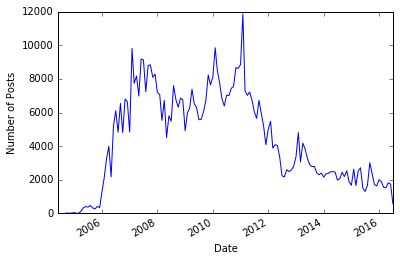

In [8]:
#Ok, now to actually graph it out
values = [1]*626450
postfreqdf = pandas.DataFrame(postdf['Datetime'])
postfreqdf['value'] = values
print postfreqdf.head()
postdatefreq = postfreqdf.set_index('Datetime').resample('M').sum()
freqplot = postdatefreq.plot(x_compat=True, legend = False)
freqplot.set(xlabel="Date", ylabel="Number of Posts")

Grouping posts by month and year, this plot shows the number of times people posted during each period. The forum seems to have reached a high level of activity around 2007, and continued to experience a relatively high level of activity until around midway through 2011. After 2011, the post count per month dropped dramatically and never recovered. In fact, the current density of posts is about at the same levels as late 2006.

In [9]:
####Getting Thread Replies from Post data###

'''Web Scraper failed to grab thread reply figures most of the time for reasons unknown (javascript?), however, I can
reassemble this data from the PostData. Having grabbed the PostURLs, I can parse these for Thread identifiers and 
use those to create a dictionary from which I can then create a dataframe and conduct the analysis'''

postdf['PostURL'][0]

threadreplies = {}

for index,row in postdf.iterrows():

    urlparts = row["PostURL"].split('/')
    threadID = urlparts[-2]
    if threadID in threadreplies:
        threadreplies[threadID] += 1
    else:
        threadreplies[threadID] = 1

repliesdf = pandas.DataFrame(threadreplies.items(), columns=['ThreadID', 'Replies'])


def urlmaker(x):
    return "http://supertalk.superfuture.com/index.php/topic/" + x + "/"
repliesdf['ThreadID'] = repliesdf['ThreadID'].apply(urlmaker)

repliesdf.rename(columns={'ThreadID': 'ThreadURL', 'Replies': 'Replies'}, inplace = True)
repliesdf.head()


,ThreadURL,Replies
0,http://supertalk.superfuture.com/index.php/top...,6
1,http://supertalk.superfuture.com/index.php/top...,10
2,http://supertalk.superfuture.com/index.php/top...,61
3,http://supertalk.superfuture.com/index.php/top...,3
4,http://supertalk.superfuture.com/index.php/top...,238


In [10]:
#Restarting from here; lets make a dataframe with ThreadURL, Replies, and Views to run a simple linear regression

regdf = repliesdf
postviews = threaddf[['ThreadURL', 'Views']]
regdf = regdf.merge(postviews, on = "ThreadURL", how = 'left')

regdf.shape
print regdf.isnull().values.any()

False


In [11]:
#Setting up inputs
import numpy
regdf['Views'] = regdf['Views'].apply(lambda x: x.replace(",",""))
y_df = pandas.DataFrame(regdf, columns = ['Views'])
finalregdf = pandas.DataFrame(regdf, columns = ['Replies']) #regdf['Replies']
print y_df.shape
print finalregdf.shape

#Regression analysis to Predict Views
from sklearn.cross_validation import train_test_split
from sklearn import datasets, linear_model
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(finalregdf, y_df, test_size = 0.2)


#Running Regression
repliesmodel = linear_model.LinearRegression()
repliesmodel.fit(X_train, y_train)
print 'Coefficients:', repliesmodel.coef_

#Testing/Evaluating model
score = repliesmodel.score(X_test, y_test)
print 'R^2 =', score



(5885, 1)
(5885, 1)
Coefficients: [[ 136.35802614]]
R^2 = 0.936237105041


This simple linear regression shows that the number of thread replies is a very strong predictor of how many views a thread cultivated. Of course, there are probably confounding factors here, and these variables are inherently correlated. Stil, its interesting to see exactly how strong the prediction of Views is based only on Replies.

**Everything below this is unfinished work**

In [17]:
#Text Mining, Classifying text? what else? idk what to do, but i gotta use the content of the posts to do something

###Looking at Word Frequency in Post Content###

#initalizing dictionary to count frequencies and hold data
wordfreq = {}

for index, row in postdf.iterrows():
    content = row['PostContent']   
    #need to still remove punctuation
    semi_clean_text = content.replace("\n"," ").replace("\t"," ")  
    clean_text = "".join(c for c in semi_clean_text if c not in string.punctuation)    
    words = clean_text.split(" ")
    
    for word in words:
        if word == '':
            continue
        else:
            if word in wordfreq:
                wordfreq[word] += 1
            else:
                wordfreq[word] = 1

    
print "Done"
print wordfreq['APC']

Done
7078
